![user-user](./wallpaper.jpg)

# Dimensionality Reduction

In [1]:
import time
import typing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Context-based splitting of item ratings in collaborative filtering

- https://link.springer.com/chapter/10.1007/978-3-642-41674-3_49

Three main approaches in Context-Aware Recommender Systems (CARSs) are pre-filtering, post-filtering and contextual modeling. Incorporating contextual information into main process is the different point of contextual modeling from two first approaches. In this paper, we first propose a new context-aware collaborative filtering (CACF) algorithm with contextual modeling approach combined from a clustering technique and matrix factorization method named Similar Trends Identifying (STI). We then compare the proposal with various matrix factorization-based algorithms. Overall, the STI algorithm outperforms some compared algorithms in terms of evaluation metrics and available contextual data sets.

## Clustering

- https://flothesof.github.io/k-means-numpy.html
- https://en.wikipedia.org/wiki/K-means_clustering
- https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [31]:
class Cluster:
    """
    k-means clustering algorithm.
    """

    def __init__(self, points: np.array, k: int) -> None:
        """
        Initialize cluster centroids randomly.
        """
        self.size: int = k
        self.points: np.array = points
        np.random.shuffle(self.points)
        self.centroids: np.array = self.points[:self.size]
        self.indices: np.array = np.empty(self.points.shape[0])
        self.cost: float = -1
    
    def get_cluster(self, k: int) -> np.array:
        """
        Returns specific group.
        """
        return self.points[self.indices == k]

    def get_clusters(self) -> typing.Generator[np.array, None, None]:
        """
        Returns all clusters arrays.
        """
        return (
            self.points[self.indices == k]
            for k in range(self.size)
            if np.any(self.indices == k)
        )
    
    def move(self) -> np.array:
        """
        Moves cluster to the next centroid.
        """
        deviation: np.array = self.points - self.centroids[:, np.newaxis]
        distances: np.array = np.sqrt(np.nansum(deviation ** 2, axis=2))
        self.indices = np.argmin(distances, axis=0)
        self.centroids = np.array([
            np.nanmean(self.get_cluster(k), axis=0)
            for k in range(self.centroids.shape[0])
            if np.any(self.indices == k)
        ])
        self.cost = np.nansum(np.array([
            (self.points[i] - self.centroids[j]) ** 2
            for i, j in enumerate(self.indices)
        ]))

COST: 1459.0287735967
COST: 686.6739087034125
COST: 403.5388100411493
COST: 337.59968512822684
COST: 316.01485934737656
COST: 308.7985941877164
COST: 306.4130873705702
COST: 305.5815705144332
COST: 305.110813422511
COST: 304.77863451598427
COST: 304.77863451598427
ROWS: 1000
COLS: 2
MISSING: 113
CENTROIDS: (4, 2)
INDICES: [2 3 3 3 3 3 0 2 3 1]
ITERATIONS: 11
ELAPSED: 0.07621359825134277
FREQUENCIES 
 [[  0 303]
 [  1 169]
 [  2 152]
 [  3 262]]


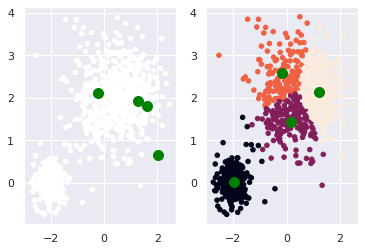

In [47]:
# Parameters.
start: float = time.time()
CLUSTERS: int = 4
ROWS: int = 1000
COLS: int = 2
MAX_ITERATIONS: int = 20
MISSING_RATE: float = 0.10

# Dataset generation.
X: np.array = np.vstack([
    np.random.randn(int(ROWS / 3), COLS) * 0.75 + np.linspace(0, 2, COLS),
    np.random.randn(int(ROWS / 3), COLS) * 0.25 + np.linspace(-2, 0, COLS),
    np.random.randn(int(ROWS / 3), COLS) * 0.50 + np.linspace(1, 2, COLS)
]).astype(float)
missing: np.array = np.random.choice(a=[True, False],
                                     size=X.shape[0],
                                     p=[MISSING_RATE, 1 - MISSING_RATE])
X[missing] = np.nan
X = X[np.count_nonzero(np.isnan(X), axis=1) != COLS]
    
# Cluster initialization.
cluster: Cluster = Cluster(X, CLUSTERS)
plt.subplot(121)
plt.scatter(cluster.points[:, 0], cluster.points[:, 1], color='white', s=20)
plt.scatter(cluster.centroids[:, 0], cluster.centroids[:, 1], color='green', s=100)

# Clustering iteration.
current_cost: float = None
last_cost: float = None
for iterations in range(MAX_ITERATIONS):
    current_cost = cluster.cost
    if current_cost == last_cost:
        break
    last_cost = current_cost
    cluster.move()
    print('COST:', cluster.cost)

# Frequencies.
(unique, counts) = np.unique(cluster.indices, return_counts=True)
frequencies: np.array = np.asarray((unique, counts)).T

# End of clustering.
plt.subplot(122)
plt.scatter(cluster.points[:, 0], cluster.points[:, 1], c=cluster.indices, s=20)
plt.scatter(cluster.centroids[:, 0], cluster.centroids[:, 1], color='green', s=100)

# Reporting.
print('ROWS:', ROWS)
print('COLS:', COLS)
print('MISSING:', np.count_nonzero(missing))
print('CENTROIDS:', cluster.centroids.shape)
print('INDICES:', cluster.indices[:10])
print('ITERATIONS:', iterations)
print('ELAPSED:', time.time() - start)
print('FREQUENCIES', "\n", frequencies)

In [48]:
# Parameters.
start: float = time.time()
CLUSTERS: int = 20
ROWS: int = 20000
COLS: int = 500
MAX_ITERATIONS: int = 10
MISSING_RATE: float = 0.50

# Dataset generation.
X: np.array = np.vstack([
    np.random.randn(int(ROWS / 3), COLS) * 0.75 + np.linspace(0, 2, COLS),
    np.random.randn(int(ROWS / 3), COLS) * 0.25 + np.linspace(-2, 0, COLS),
    np.random.randn(int(ROWS / 3), COLS) * 0.50 + np.linspace(1, 2, COLS)
]).astype(float)
missing: np.array = np.random.choice(a=[True, False],
                                     size=X.shape[0],
                                     p=[MISSING_RATE, 1 - MISSING_RATE])
X[missing] = np.nan
X = X[np.count_nonzero(np.isnan(X), axis=1) != COLS]

# Cluster initialization.
cluster: Cluster = Cluster(X, CLUSTERS)

# Clustering iteration.
current_cost: float = None
last_cost: float = None
for iterations in range(MAX_ITERATIONS):
    current_cost = cluster.cost
    if current_cost == last_cost:
        break
    last_cost = current_cost
    cluster.move()
    print('COST:', cluster.cost)
    
# Frequencies.
(unique, counts) = np.unique(cluster.indices, return_counts=True)
frequencies: np.array = np.asarray((unique, counts)).T

# Reporting.
print('ROWS:', ROWS)
print('COLS:', COLS)
print('MISSING:', np.count_nonzero(missing))
print('CENTROIDS:', cluster.centroids.shape)
print('INDICES:', cluster.indices[:10])
print('ITERATIONS:', iterations)
print('ELAPSED:', time.time() - start)
print('FREQUENCIES', "\n", frequencies)

COST: 1509362.694778643
COST: 1449217.5120776729
COST: 1448366.2750438682
COST: 1447891.687654498
COST: 1447595.622660101
COST: 1447413.5266797356
COST: 1447287.5421604824
COST: 1447197.8055846393
COST: 1447124.1846859844
COST: 1447069.4417763771
ROWS: 20000
COLS: 500
MISSING: 10026
CENTROIDS: (20, 500)
INDICES: [0 1 2 3 4 5 6 7 8 9]
ITERATIONS: 9
ELAPSED: 10.121702671051025
FREQUENCIES 
 [[   0  479]
 [   1  496]
 [   2  367]
 [   3  828]
 [   4 1087]
 [   5  455]
 [   6    1]
 [   7   15]
 [   8  837]
 [   9  667]
 [  10  500]
 [  11  456]
 [  12  510]
 [  13  757]
 [  14  532]
 [  15  445]
 [  16  468]
 [  17  464]
 [  18    2]
 [  19  606]]
